the link of the data set:
- https://www.kaggle.com/datasets/gpiosenka/good-guysbad-guys-image-data-set?select=images+to+predict

# Import the libraries

In [14]:
#import the important libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.callbacks import EarlyStopping

import PIL
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report,confusion_matrix
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings('ignore')
import zipfile
import matplotlib.pyplot as plt
import numpy as np

# Load the data from kaggel

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d gpiosenka/good-guysbad-guys-image-data-set

100% 585M/586M [00:05<00:00, 147MB/s]
100% 586M/586M [00:05<00:00, 115MB/s]


In [8]:
#extract the zip fill of data
zip_ref = zipfile.ZipFile('/content/good-guysbad-guys-image-data-set.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Import  the  train and validation data sets

In [9]:
train = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=30,
    image_size=(256,256)
)

validation = keras.utils.image_dataset_from_directory(
    directory = '/content/valid',
    labels='inferred',
    label_mode = 'int',
    batch_size=40,
    image_size=(256,256)
)

Found 11220 files belonging to 2 classes.
Found 600 files belonging to 2 classes.


In [10]:
#show the class inside the sets
train_dir = ('/content/train')
validation_dir = ('/content/valid')
classes_train =os.listdir(train_dir)
classes_val =os.listdir(validation_dir)
classes_train
classes_val

['savory', 'unsavory']

In [11]:
# Data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.1,
    zoom_range=0.1,
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='constant',cval=125,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
         )


train_generator=train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size= 156,
    target_size=(64, 64)
)

val_datagen=ImageDataGenerator(rescale=1./255)
val_generator=val_datagen.flow_from_directory(
    validation_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=40,
    target_size=(64, 64)
)



Found 11220 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [12]:
SIZE=64
INPUT_SHAPE = (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3),
                               activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)
conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3),
                               activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(1, activation='sigmoid')(drop4)

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

Epoch 1/30
72/72 [==============================] - 96s 1s/step - loss: 0.5460 - accuracy: 0.7466 - val_loss: 0.6604 - val_accuracy: 0.5283
Epoch 2/30
72/72 [==============================] - 93s 1s/step - loss: 0.4178 - accuracy: 0.8064 - val_loss: 1.4713 - val_accuracy: 0.5000
Epoch 3/30
72/72 [==============================] - 94s 1s/step - loss: 0.3778 - accuracy: 0.8306 - val_loss: 2.1192 - val_accuracy: 0.5000
Epoch 4/30
72/72 [==============================] - 93s 1s/step - loss: 0.3536 - accuracy: 0.8437 - val_loss: 0.9280 - val_accuracy: 0.5767
Epoch 5/30
72/72 [==============================] - 93s 1s/step - loss: 0.3296 - accuracy: 0.8579 - val_loss: 0.6554 - val_accuracy: 0.6967
Epoch 6/30
72/72 [==============================] - 92s 1s/step - loss: 0.3182 - accuracy: 0.8621 - val_loss: 0.6199 - val_accuracy: 0.7500
Epoch 7/30
72/72 [==============================] - 94s 1s/step - loss: 0.2921 - accuracy: 0.8781 - val_loss: 0.6280 - val_accuracy: 0.7450
Epoch 8/30
72/72 [==

<Axes: >

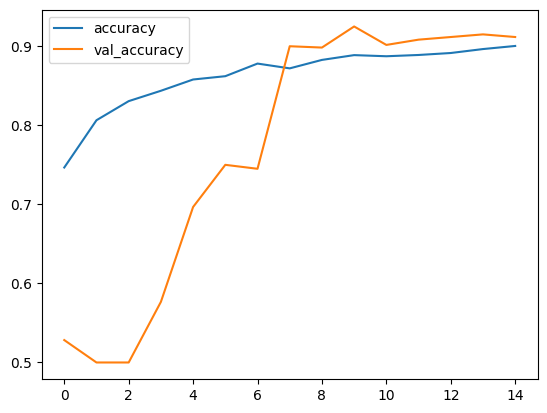

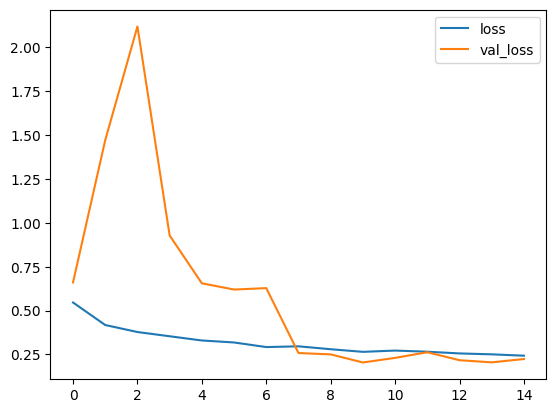

In [18]:
#fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history=model.fit_generator(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    verbose=1,
    shuffle=False,
        callbacks=[early_stopping]  # Include early stopping callback


)

#plot the accurcy
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

1/1 [==============================] - 0s 45ms/step


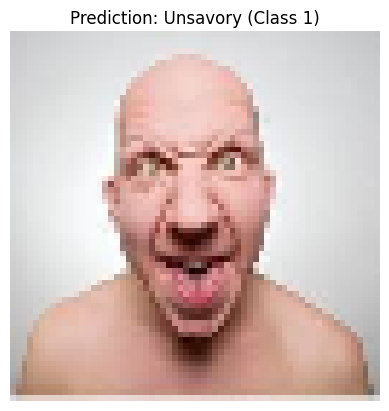

In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
img_path = '/content/test.jpg'  # Replace 'path_to_your_image.jpg' with the actual path to your image
img = image.load_img(img_path, target_size=(64, 64))  # Specify the target size expected by your model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Display the image
plt.imshow(img)
plt.axis('off')

# Make predictions
predictions = model.predict(img_array)

# Interpret predictions
if predictions[0][0] < 0.5:
    plt.title("Prediction: Savory (Class 0)")
else:
    plt.title("Prediction: Unsavory (Class 1)")

plt.show()


1/1 [==============================] - 0s 142ms/step


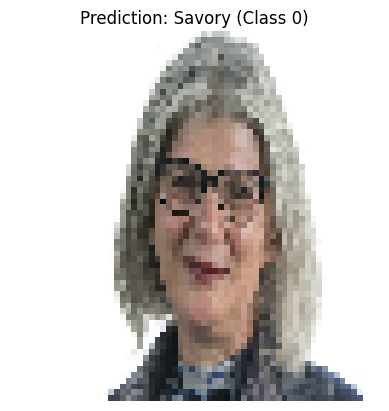

In [23]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
img_path = '/content/s465_heather-savory.jpg'  # Replace 'path_to_your_image.jpg' with the actual path to your image
img = image.load_img(img_path, target_size=(64, 64))  # Specify the target size expected by your model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Display the image
plt.imshow(img)
plt.axis('off')

# Make predictions
predictions = model.predict(img_array)

# Interpret predictions
if predictions[0][0] < 0.5:
    plt.title("Prediction: Savory (Class 0)")
else:
    plt.title("Prediction: Unsavory (Class 1)")

plt.show()